#### KNN (K-Nearest Neighbours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/scaler.csv')

In [4]:
df.head()

,User_ID,Gender,No_of_Days,No_of_Calls,Enrolled
0,15624510,Male,0,0.30,0
1,15810944,Male,15,0.37,0
2,15668575,Female,6,2.07,0
3,15603246,Female,7,3.11,0
4,15804002,Male,0,4.52,0


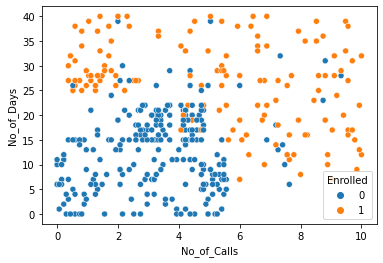

In [6]:
sns.scatterplot(x = 'No_of_Calls', y= 'No_of_Days', hue='Enrolled', data=df)
plt.show()

In [7]:
df = df[['No_of_Calls','No_of_Days','Enrolled']]

In [9]:
df = df.sample(frac=1.0)

In [10]:
df.shape[0] * 0.8

320.0

In [13]:
train = df.iloc[:320, :].values
test = df.iloc[320:, :].values

In [14]:
X_train = train[:,:-1]
y_train = train[:,-1]

X_test = test[:,:-1]
y_test = test[:,-1]

In [15]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [16]:
y_train.shape, y_test.shape

((320,), (80,))

#### Standardising the data

In [17]:
mu = X_train.mean(axis = 0)
sig = X_train.std(axis = 0)

In [18]:
X_train = (X_train - mu)/sig
X_test = (X_test - mu)/sig

In [48]:
def dist(a,b):
    return np.linalg.norm(a-b)

def KNNPredict(X_train, y_train, x_query, k=5):
    distances = []
    n = X_train.shape[0]

    for i in range(n):
        d = dist(x_query, X_train[i])
        distances.append((d,y_train[i]))
    
    distances = sorted(distances)
    distances = distances[:k]
    distances = np.array(distances)
    labels = distances[:,-1]

    ans = int(pd.Series(labels).value_counts().index[0])

    return ans

In [49]:
KNNPredict(X_train,y_train,X_test[73])

0

In [50]:
X_test[73]

array([ 0.53404935, -0.94808863])

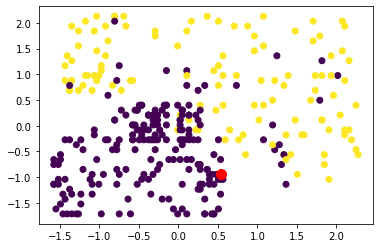

In [54]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.scatter(X_test[73][0], X_test[73][1], c='red', s = 100)
plt.show()